# NASA climate data


The data fetching/wrangling script can be found at [fetch_wrangle.py](fetch_wrangle.py)





## Global temperature data

The context and data for this comes from NASA's page, [Climate Change: Vital Signs of the Planet: Global Temperature](https://climate.nasa.gov/vital-signs/global-temperature/).





### Temps chart

![global temps chart snapshot](./assets/nasa-global-temp-snapshot.png)


### The setup


In [2]:
import altair as alt
import pandas as pd
from pathlib import Path
DATAPATH = Path('./datastash', 'tidied')
alt.renderers.enable('notebook');

In [3]:
gtemps_path = DATAPATH.joinpath('global_temps.csv')
df = pd.read_csv(gtemps_path)
df.head()


,year,type,temperature_anomaly_celsius
0,1880,annual_mean,-0.19
1,1880,lowess,-0.11
2,1881,annual_mean,-0.10
3,1881,lowess,-0.14
4,1882,annual_mean,-0.10


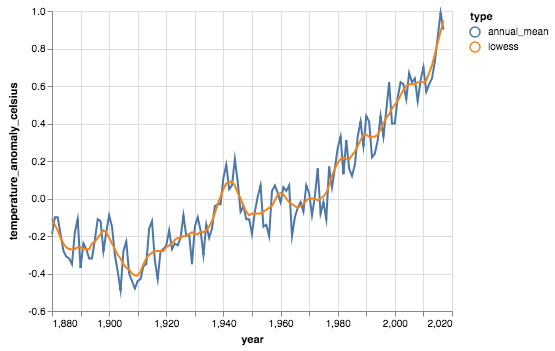

In [4]:
gtemps_chart = alt.Chart(df)
gtemps_chart.mark_line().encode(x='year', y='temperature_anomaly_celsius', color='type')


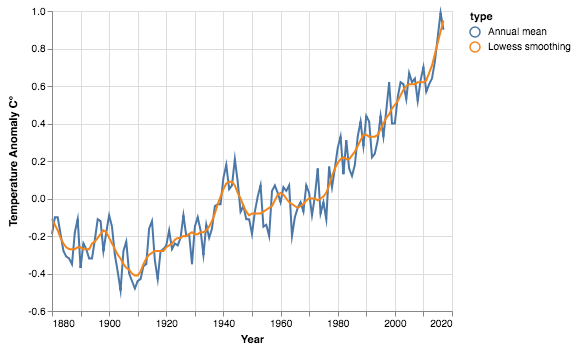

In [5]:
gtemps_chart = alt.Chart(df.replace('lowess', 'Lowess smoothing').replace('annual_mean', 'Annual mean'))

xcode = alt.X('year', axis=alt.Axis(title='Year', format='.4'))
ycode = alt.Y('temperature_anomaly_celsius', axis=alt.Axis(title='Temperature Anomaly C°'))

gtemps_chart.mark_line().encode(x=xcode, y=ycode, color='type')

### Replicating NASA snapshot style

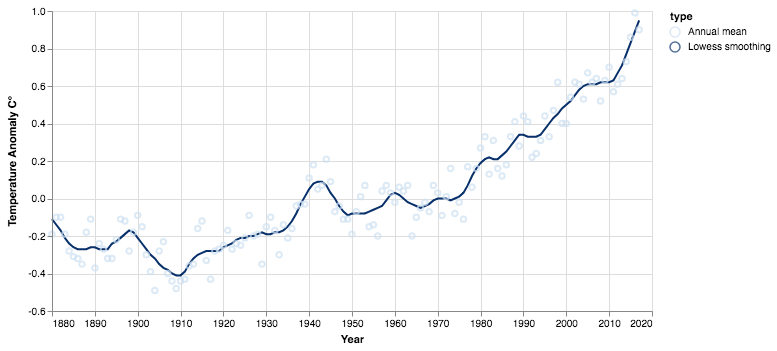

In [6]:
lowess_df = df.query('(type == "lowess")').replace('lowess', 'Lowess smoothing')
mean_df = df.query('(type == "annual_mean")').replace('annual_mean', 'Annual mean')

lowess_chart = alt.Chart(lowess_df
               ).mark_line() #.encode(x='year', y='temperature_anomaly_celsius', color='type')

mean_chart = alt.Chart(mean_df
                           ).mark_point() #.encode(x='year', y='temperature_anomaly_celsius', color='type')


xcode = alt.X('year:Q', axis=alt.Axis(title='Year', format='.4'))
ycode = alt.Y('temperature_anomaly_celsius:Q', axis=alt.Axis(title='Temperature Anomaly C°'))


gtemps_chart = alt.LayerChart().encode(xcode, ycode, color='type:O')

gtemps_chart = gtemps_chart.add_layers(lowess_chart, mean_chart)

gtemps_chart.configure_view(width=600, height=300)

## Charting the delta




In [19]:
meandf = df.copy().query('(type == "annual_mean")').reset_index(drop=True)
meandf['delta_mean'] = meandf['temperature_anomaly_celsius'].diff()
meandf.head()

,year,type,temperature_anomaly_celsius,delta_mean
0,1880,annual_mean,-0.19,NaN
1,1881,annual_mean,-0.10,0.09
2,1882,annual_mean,-0.10,0.00
3,1883,annual_mean,-0.19,-0.09
4,1884,annual_mean,-0.28,-0.09


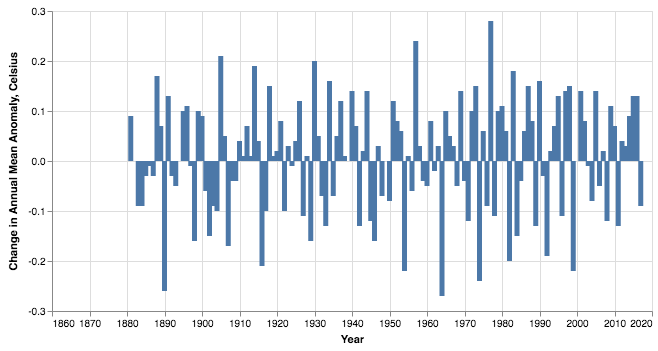

In [20]:
xcode = alt.X('year:Q', axis=alt.Axis(title='Year', format='.4'))
ycode = alt.Y('delta_mean:Q', axis=alt.Axis(title='Change in Annual Mean Anomaly, Celsius'))

alt.Chart(meandf).mark_bar().encode(xcode, ycode).configure_view(width=600, height=300)
    


## Experimenting with aggregation


This XKCD comic tries to include a much bigger timescale, which puts the delta of the p



In [21]:
import numpy as np
periods = np.arange(1880, 2030, 10)

In [23]:
aggdf = meandf.copy()
aggdf['period'] = pd.cut(aggdf['year'], periods, include_lowest=True, precision=0, right=False)
aggdf.tail(10)

,year,type,temperature_anomaly_celsius,delta_mean,period
128,2008,annual_mean,0.52,-0.12,"[2000, 2010)"
129,2009,annual_mean,0.63,0.11,"[2000, 2010)"
130,2010,annual_mean,0.70,0.07,"[2010, 2020)"
131,2011,annual_mean,0.57,-0.13,"[2010, 2020)"
132,2012,annual_mean,0.61,0.04,"[2010, 2020)"
133,2013,annual_mean,0.64,0.03,"[2010, 2020)"
134,2014,annual_mean,0.73,0.09,"[2010, 2020)"
135,2015,annual_mean,0.86,0.13,"[2010, 2020)"
136,2016,annual_mean,0.99,0.13,"[2010, 2020)"
137,2017,annual_mean,0.90,-0.09,"[2010, 2020)"


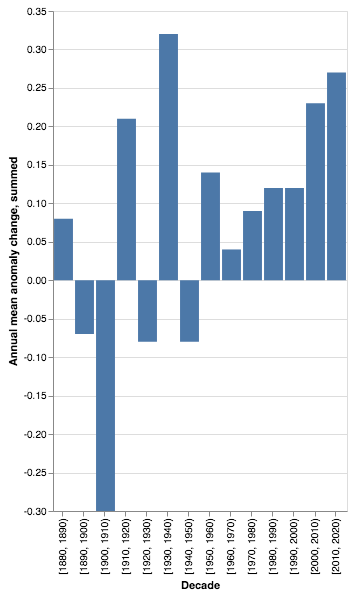

In [25]:
xcode = alt.X('period:O', axis=alt.Axis(title='Decade'))
ycode = alt.Y('sum(delta_mean)', axis=alt.Axis(title='Annual mean anomaly change, summed'))
alt.Chart(aggdf).mark_bar().encode(x=xcode, y=ycode).configure_view(width=700, height=500)

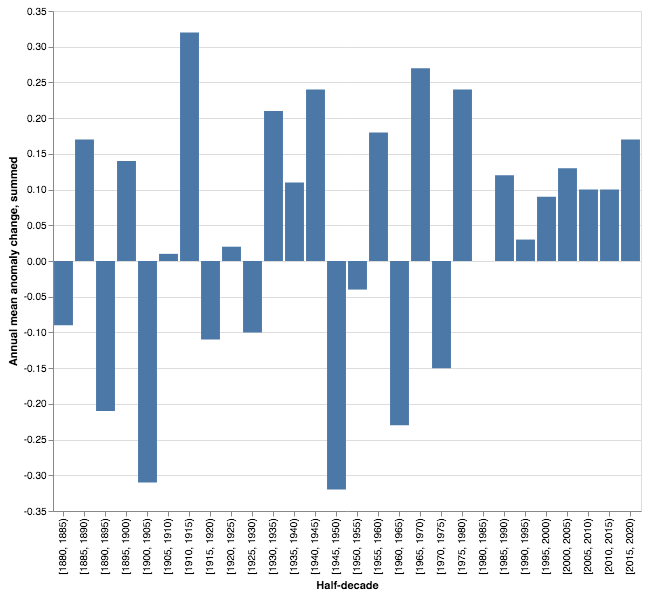

In [26]:
# 5 year periods

aggdf = meandf.copy()
periods = np.arange(1880, 2030, 5)
aggdf['period'] = pd.cut(aggdf['year'], periods, include_lowest=True, precision=0, right=False)
aggdf.tail(10)

xcode = alt.X('period:O', axis=alt.Axis(title='Half-decade'))
ycode = alt.Y('sum(delta_mean)', axis=alt.Axis(title='Annual mean anomaly change, summed'))
alt.Chart(aggdf).mark_bar().encode(x=xcode, y=ycode).configure_view(width=700, height=500)

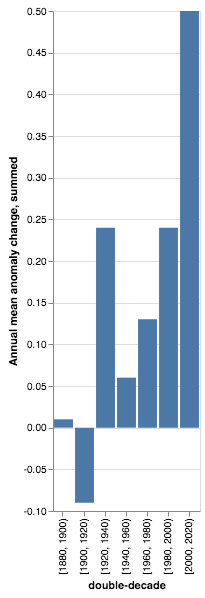

In [27]:
# 20 year periods

aggdf = meandf.copy()
periods = np.arange(1880, 2030, 20)
aggdf['period'] = pd.cut(aggdf['year'], periods, include_lowest=True, precision=0, right=False)
aggdf.tail(10)

xcode = alt.X('period:O', axis=alt.Axis(title='double-decade'))
ycode = alt.Y('sum(delta_mean)', axis=alt.Axis(title='Annual mean anomaly change, summed'))
alt.Chart(aggdf).mark_bar().encode(x=xcode, y=ycode).configure_view(width=700, height=500)

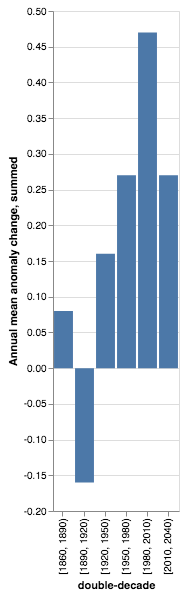

In [30]:
# 50 year periods

aggdf = meandf.copy()
periods = np.arange(1800, 2100, 30)
aggdf['period'] = pd.cut(aggdf['year'], periods, include_lowest=True, precision=0, right=False)
aggdf.tail(10)

xcode = alt.X('period:O', axis=alt.Axis(title='double-decade'))
ycode = alt.Y('sum(delta_mean)', axis=alt.Axis(title='Annual mean anomaly change, summed'))
alt.Chart(aggdf).mark_bar().encode(x=xcode, y=ycode).configure_view(width=700, height=500)